<a href="https://colab.research.google.com/github/rcazevedo/Fuzzy-Sets/blob/main/INPE_CAP_424_3_FuzzySerie7_Cap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mamdani COA: 0.8359


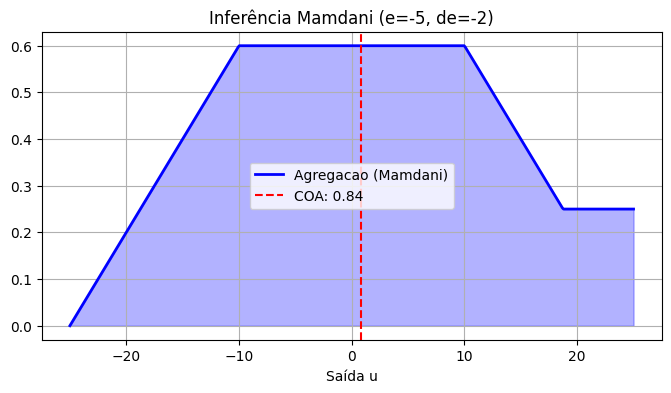

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Funcoes Auxiliares ---
def ramp_down(x, start, end):
    return np.maximum(0, np.minimum(1, (end - x) / (end - start)))

def ramp_up(x, start, end):
    return np.maximum(0, np.minimum(1, (x - start) / (end - start)))

def trimf(x, params):
    a, b, c = params
    # Correção: Parenteses fechados corretamente e remoção de espaços
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Funcoes de Pertinencia
def mu_e_N(x): return ramp_down(x, -20, 0)
def mu_e_Z(x): return trimf(x, [-20, 0, 20])
def mu_e_P(x): return ramp_up(x, 0, 20)

def mu_de_N(x): return ramp_down(x, -10, 10)
def mu_de_P(x): return ramp_up(x, -10, 10)

def mu_u_N(x): return ramp_down(x, -25, 0)
def mu_u_Z(x): return trimf(x, [-25, 0, 25])
def mu_u_P(x): return ramp_up(x, 0, 25)

# Motor de Inferencia
def fuzzy_process(e_val, de_val, method='mamdani'):
    # Fuzzificacao
    # Correção: Aspas retas e remoção de espaços nas chaves ('N' em vez de 'N ')
    w_e = {'N': mu_e_N(e_val), 'Z': mu_e_Z(e_val), 'P': mu_e_P(e_val)}
    w_de = {'N': mu_de_N(de_val), 'P': mu_de_P(de_val)}

    # Regras (Min para AND)
    # Correção: Removido o número '2' solto que estava entre as linhas
    rule_P = np.maximum(np.minimum(w_e['N'], w_de['N']),
                        np.minimum(w_e['N'], w_de['P']))

    rule_Z = np.maximum(np.minimum(w_e['Z'], w_de['N']),
                        np.minimum(w_e['Z'], w_de['P']))

    rule_N = np.maximum(np.minimum(w_e['P'], w_de['N']),
                        np.minimum(w_e['P'], w_de['P']))

    u_vals = np.linspace(-25, 25, 500)

    # Implicacao
    # Correção: Remoção de espaços na string de comparação
    if method == 'mamdani': # Corte (Min)
        out_P = np.minimum(rule_P, mu_u_P(u_vals))
        out_Z = np.minimum(rule_Z, mu_u_Z(u_vals))
        out_N = np.minimum(rule_N, mu_u_N(u_vals))
    else: # Escala (Prod - Larsen)
        out_P = rule_P * mu_u_P(u_vals)
        out_Z = rule_Z * mu_u_Z(u_vals)
        out_N = rule_N * mu_u_N(u_vals)

    agg = np.maximum(out_P, np.maximum(out_Z, out_N))

    # Evitar divisão por zero se a agregação for nula
    if np.sum(agg) == 0:
        coa = 0
    else:
        coa = np.sum(u_vals * agg) / np.sum(agg)

    return coa, u_vals, agg

# Execucao Problema 1
e_in, de_in = -5, -2
coa_m, x_m, y_m = fuzzy_process(e_in, de_in, 'mamdani')

# Plotagem
plt.figure(figsize=(8, 4))
plt.plot(x_m, y_m, 'b-', linewidth=2, label='Agregacao (Mamdani)')
plt.fill_between(x_m, y_m, alpha=0.3, color='blue')
# Correção: F-string formatada corretamente
plt.axvline(coa_m, color='r', linestyle='--', label=f'COA: {coa_m:.2f}')
# Correção: Texto dos títulos corrigido (acentuação e espaços)
plt.title(f'Inferência Mamdani (e={e_in}, de={de_in})')
plt.xlabel('Saída u')
plt.legend()
plt.grid(True)
plt.savefig('exercicio1_mamdani.png') # Salva figura para o Overleaf
print(f"Mamdani COA: {coa_m:.4f}")

Larsen COA: 1.3206


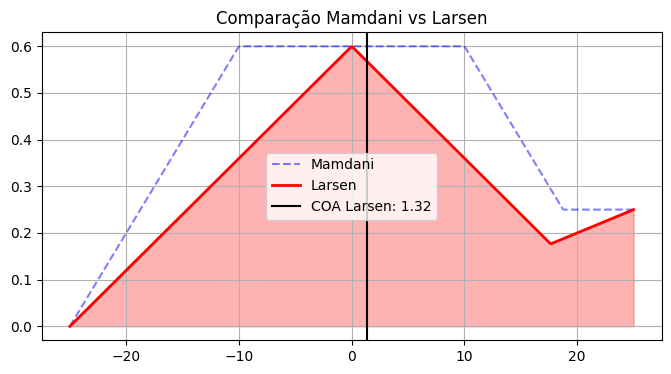

In [ ]:
# Execucao Problema 2
coa_l, x_l, y_l = fuzzy_process(e_in, de_in, 'larsen')

# Plotagem Comparativa
plt.figure(figsize=(8, 4))
plt.plot(x_m, y_m, 'b--', alpha=0.5, label='Mamdani')
plt.plot(x_l, y_l, 'r-', linewidth=2, label='Larsen')
plt.fill_between(x_l, y_l, alpha=0.3, color='red')
plt.axvline(coa_l, color='k', linestyle='-', label=f'COA Larsen: {coa_l:.2f}')
plt.title(f'Comparação Mamdani vs Larsen')
plt.legend()
plt.grid(True)
plt.savefig('exercicio2_larsen.png') # Salva figura
print(f"Larsen COA: {coa_l:.4f}")

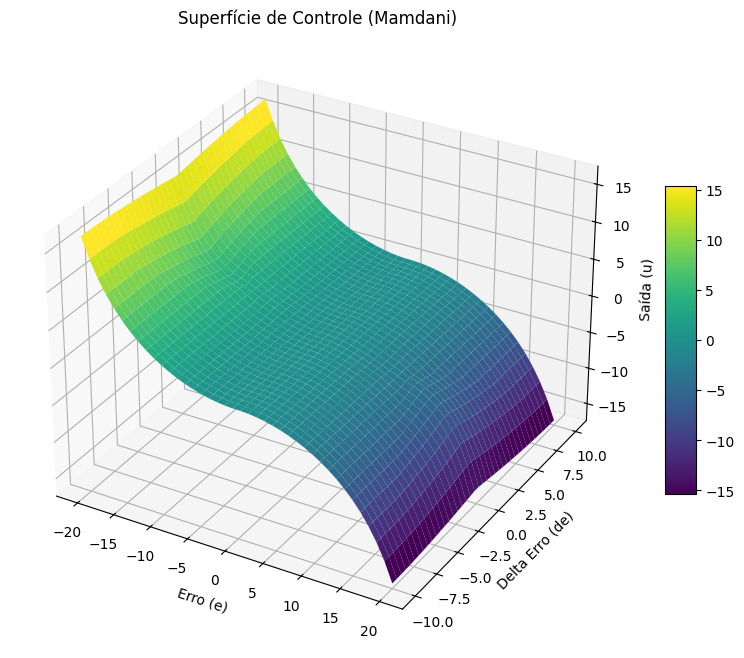

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Grid
e_grid = np.linspace(-20, 20, 40)
de_grid = np.linspace(-10, 10, 40)
E, DE = np.meshgrid(e_grid, de_grid)
U = np.zeros_like(E)

# Simulacao
for i in range(len(de_grid)):
    for j in range(len(e_grid)):
        val, _, _ = fuzzy_process(E[i,j], DE[i,j], 'mamdani')
        U[i, j] = val

# Plotagem 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(E, DE, U, cmap='viridis', edgecolor='none')
ax.set_title('Superfície de Controle (Mamdani)')
ax.set_xlabel('Erro (e)')
ax.set_ylabel('Delta Erro (de)')
ax.set_zlabel('Saída (u)')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('exercicio5_superficie.png') # Salva figura